# Getting started with ReSurfEMG

This notebook is intented for guiding the users in getting familiar with the ReSurfEMG package. The basic functionalities are shown as an example on how to use the package to analysie your EMG data.

## Import libraries

In [1]:
%matplotlib widget
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
from resurfemg.config import make_realistic_syn_emg
import resurfemg.helper_functions as hf
import resurfemg.multi_lead_type as mlt

# Create synthetic data

In order to start using the package, we need to have a set of data to use. For this reason, we will create synthetic data using the ReSurfEMG, and we will use them to demonstrate a set of functionalities.

To create the synthetic data, we will make use of the symulated ECG data already provided in the repo.

In [3]:
synth_ecg = np.load(os.path.join('..', 'synth_data', 'synth_ecg_array.npy'))
synth_list = make_realistic_syn_emg(synth_ecg, 1)
synth_emg = synth_list[0]

We can also save the created synthetica data and load them, as an example on how to load data in with .npy extention. For a more extensive example, the basic_emg_analysis notebook can be used.

In this case the data will be saved in the ..\synth_data\synth_emg folder.

In [6]:
out_path = os.path.join('..', 'synth_data', 'synth_emgsynth_emg')
if not (os.path.exists(out_path)):
    os.mkdir(out_path)
out_fname = os.path.join(out_path, 'synth_emg_file.npy')
np.save(out_fname, synth_emg)

In [7]:
emg_data = np.load(out_fname)

### Visualize the data

The following slider can be used to select a part of the data to be visualized and further analyzed in the.

In [8]:
int_slider1 = widgets.IntSlider(
    min=0, max=int(len(emg_data[0])*0.89), step=1,
    description=' samples start'
)
int_slider2 = widgets.IntSlider(
    value=len(emg_data[0]),
    min=0, max=int(len(emg_data[0])*0.89), step=1,
    description='samples end cutoff'
)
    
widgets.VBox([int_slider1,int_slider2,])

plot the selected data

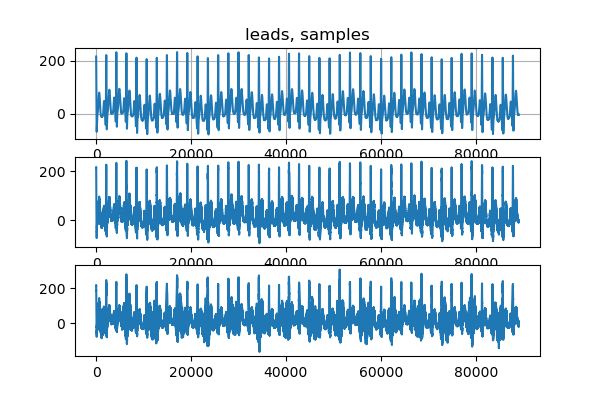

In [9]:
start = int_slider1.value
end= int_slider2.value

x = emg_data
fig, (ax_1,ax_2,ax_3) = plt.subplots(nrows = 3, figsize=(6, 4))
ax_1.grid(True)
ax_1.plot(x[0][int(start):int(end)])
ax_1.set(title='leads, samples')
ax_2.plot(x[1][int(start):int(end)])
ax_3.plot(x[2][int(start):int(end)])

# Data Processing

## Filtering

Here we show an example on how to apply a simple filter to the data using the package. In this case, a highpass filter is used

In [10]:
sample_rate = 2048 # this is the sample rate used to generate the synthetic data
cutoff_frequency = 20

high_pass_filtered = hf.emg_highpass_butter(emg_data, cutoff_frequency, sample_rate)

We can see the results

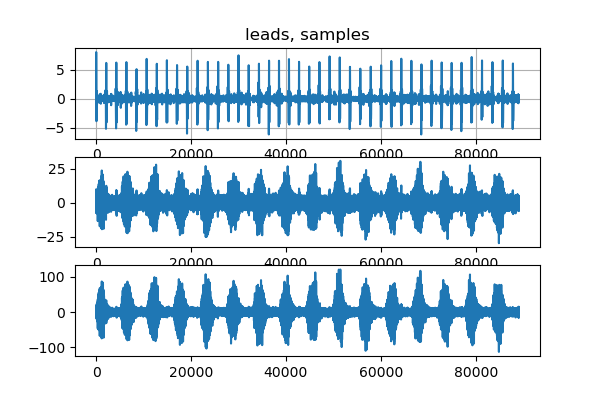

In [14]:
x = high_pass_filtered
fig, (ax_1,ax_2,ax_3) = plt.subplots(nrows = 3, figsize=(6, 4))
ax_1.grid(True)
ax_1.plot(x[0][int(start):int(end)])
ax_1.set(title='leads, samples')
ax_2.plot(x[1][int(start):int(end)])
ax_3.plot(x[2][int(start):int(end)])

## ECG removal

An important step in the analysis of the EMG signal of respiratory muscles is the removal of ECG noise. Here we show, as an example, how to use the ReSurfEMG package to apply an ICA decomposition for the ECG noise reduction.
The `compute_ICA_n_comp_selective_zeroing` method used for this purpose, requires to specify in wich lead the ECG is predominant. The synthetic data have been created so that lead 0 contains mostly ECG noise, so we are using that lead as a reference.

In [16]:
emg_ica = mlt.compute_ICA_n_comp_selective_zeroing(high_pass_filtered, 0)

c:\users\walterbaccinelli\anaconda3\envs\emgdash\lib\site-packages\sklearn\decomposition\_fastica.py:488: FutureWarning: From version 1.3 whiten='unit-variance' will be used by default.
  warnings.warn(


Let's see the results

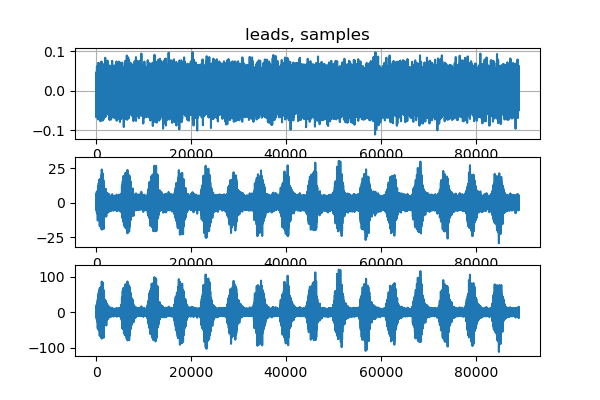

In [17]:
x = emg_ica
fig, (ax_1,ax_2,ax_3) = plt.subplots(nrows = 3, figsize=(6, 4))
ax_1.grid(True)
ax_1.plot(x[0][int(start):int(end)])
ax_1.set(title='leads, samples')
ax_2.plot(x[1][int(start):int(end)])
ax_3.plot(x[2][int(start):int(end)])    

## Envelope calculation

Here we show how it is possible to calculate the envelope of the cleaned signal, using the RMS. 

In [18]:
window_length = 512 # the length is in samples. In this case the window length is 250ms

# let's analyse just one lead
emg_ica_lead = emg_ica[1]

emg_envelope = hf.full_rolling_rms(emg_ica_lead, window_length)

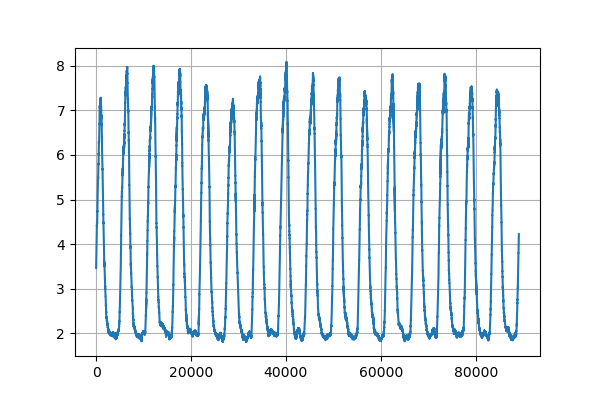

In [19]:
x = emg_envelope
fig, ax_1= plt.subplots(nrows = 1, figsize=(6, 4))
ax_1.grid(True)
ax_1.plot(x[int(start):int(end)])